## Mental disorder binary classifications 

Based on the students details we predict the mental disorder classification yes or no. In here we handle class imbalance problem. Its binary classification problem. In this notebook we did these following steps. 

### 1. Importing Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.max_columns", 100)

### 2. Loading Datasets

In [2]:
# Load the datasets
file = "datasets/clean_data.csv"
df = pd.read_csv(file)

### 3. Explore Datasets

In [3]:

df.head()

,Unnamed: 0,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits
0,0,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion
1,1,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision
2,2,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion
3,3,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience
4,4,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision


In [4]:
df.shape

(219, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              219 non-null    int64 
 1   IndividualProject       219 non-null    object
 2   Age                     219 non-null    int64 
 3   Gender                  219 non-null    object
 4   City                    219 non-null    object
 5   Influenced              219 non-null    object
 6   Perseverance            219 non-null    int64 
 7   DesireToTakeInitiative  219 non-null    int64 
 8   Competitiveness         219 non-null    int64 
 9   SelfReliance            219 non-null    int64 
 10  StrongNeedToAchieve     219 non-null    int64 
 11  SelfConfidence          219 non-null    int64 
 12  GoodPhysicalHealth      219 non-null    int64 
 13  MentalDisorder          219 non-null    object
 14  KeyTraits               219 non-null    object
dtypes: int

In [6]:
df.columns

Index(['Unnamed: 0', 'IndividualProject', 'Age', 'Gender', 'City',
       'Influenced', 'Perseverance', 'DesireToTakeInitiative',
       'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve',
       'SelfConfidence', 'GoodPhysicalHealth', 'MentalDisorder', 'KeyTraits'],
      dtype='object')

### 4. Data preprocessing

In [7]:
# Data cleaning
# Drop unwanted columns

df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
# Checking missing values
df.isna().sum().sum()

0

In [9]:
df.columns

Index(['IndividualProject', 'Age', 'Gender', 'City', 'Influenced',
       'Perseverance', 'DesireToTakeInitiative', 'Competitiveness',
       'SelfReliance', 'StrongNeedToAchieve', 'SelfConfidence',
       'GoodPhysicalHealth', 'MentalDisorder', 'KeyTraits'],
      dtype='object')

### 5. EDA

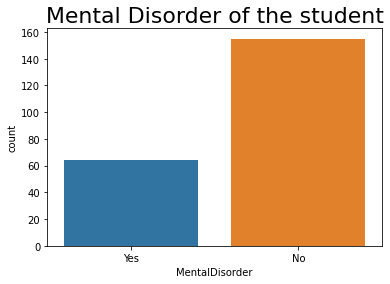

In [10]:
plt.title('Mental Disorder of the student', fontsize=22)
sns.countplot(x=df.MentalDisorder);

In [11]:
df['MentalDisorder'].value_counts(normalize=True)

No     0.707763
Yes    0.292237
Name: MentalDisorder, dtype: float64

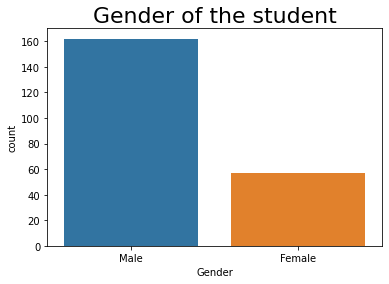

In [12]:
plt.title('Gender of the student', fontsize=22)
sns.countplot(x=df.Gender);

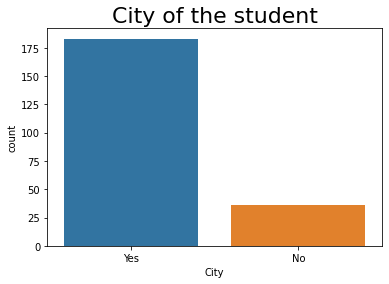

In [13]:
plt.title('City of the student', fontsize=22)
sns.countplot(x=df.City);

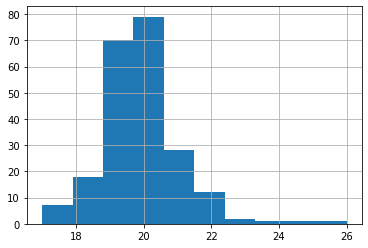

In [14]:
df['Age'].hist();

In [15]:
# label 0 and 1
df['MentalDisorder'].replace(['Yes','No'],[1, 0],inplace=True)

### 6. Input and Target Columns

In [16]:
# Sperate the data, features and label
features_df = df.drop('MentalDisorder', axis='columns')
labels_df = df.MentalDisorder

In [17]:
# for predict one row
sample_predict_data = features_df.sample(1)

### 7. Encode categorical columns to one-hot vectors

In [18]:
# Encoder
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['Age' 'Perseverance' 'DesireToTakeInitiative' 'Competitiveness'
 'SelfReliance' 'StrongNeedToAchieve' 'SelfConfidence'
 'GoodPhysicalHealth']


In [19]:
categori_cols = features_df.columns[features_df.dtypes == "object"].values
print(categori_cols)

['IndividualProject' 'Gender' 'City' 'Influenced' 'KeyTraits']


In [20]:
features_df[categori_cols].nunique()

IndividualProject    2
Gender               2
City                 2
Influenced           2
KeyTraits            5
dtype: int64

In [21]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(features_df[categori_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [22]:
encoder.categories_

[array(['No', 'Yes'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Passion', 'Positivity', 'Resilience', 'Vision', 'Work Ethic'],
       dtype=object)]

In [23]:
encoded_cols = list(encoder.get_feature_names(categori_cols))
print(encoded_cols)

['IndividualProject_No', 'IndividualProject_Yes', 'Gender_Female', 'Gender_Male', 'City_No', 'City_Yes', 'Influenced_No', 'Influenced_Yes', 'KeyTraits_Passion', 'KeyTraits_Positivity', 'KeyTraits_Resilience', 'KeyTraits_Vision', 'KeyTraits_Work Ethic']


In [24]:
features_df[encoded_cols] = encoder.transform(features_df[categori_cols])

In [25]:
# features_df.head()

In [26]:
features_df.shape

(219, 26)

### 8. Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, stratify = labels_df, test_size=0.2, random_state=42)

In [28]:
print(X_train.shape)
print(X_test.shape)

(175, 26)
(44, 26)


In [29]:
y_train.value_counts(normalize=True)

0    0.708571
1    0.291429
Name: MentalDisorder, dtype: float64

In [30]:
y_test.value_counts(normalize=True)

0    0.704545
1    0.295455
Name: MentalDisorder, dtype: float64

In [31]:
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes('category').columns.tolist()

In [32]:
X_train = X_train[numeric_cols]
X_test = X_test[numeric_cols]
print(X_train.shape)

(175, 21)


### 9. Model training & Evaluation

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [34]:
# define class weights for class imblance problem. 70 percent in 0 label and 30 in 1
w = {0:0.7, 1:0.3}

In [35]:
model = LogisticRegression(solver='liblinear',random_state = 22, class_weight=w)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [36]:
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)


print(f"Train Accuracy = {train_acc} ")
print(f"Test Accuracy = {test_acc} ")

Train Accuracy = 0.7085714285714285 
Test Accuracy = 0.7045454545454546 


In [37]:
print(classification_report(y_train, train_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       124
           1       0.00      0.00      0.00        51

    accuracy                           0.71       175
   macro avg       0.35      0.50      0.41       175
weighted avg       0.50      0.71      0.59       175



In [38]:
print(classification_report(y_test, test_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83        31
           1       0.00      0.00      0.00        13

    accuracy                           0.70        44
   macro avg       0.35      0.50      0.41        44
weighted avg       0.50      0.70      0.58        44



In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, test_pred)
print(cm)
accuracy_score(y_test, test_pred)

[[31  0]
 [13  0]]


0.7045454545454546

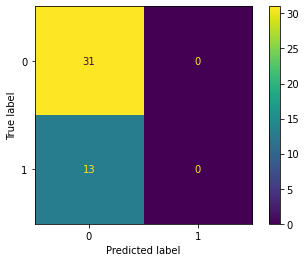

In [40]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

### 10. Model store and load the model

In [41]:
import pickle
filename = 'saved_model/final_mental_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [42]:
# load the model from disk
train_model = pickle.load(open(filename, 'rb'))

### 11. Prediction of input data

In [43]:
sample_predict_data

,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,KeyTraits
139,No,20,Male,No,Yes,2,2,3,2,3,3,2,Resilience


In [44]:
sample_predict_data.shape

(1, 13)

In [45]:
from sklearn.preprocessing import OneHotEncoder

def predict_the_result(input_data, model_name):
    
    """ Predict the result based on the input values"""
    numeric_cols = input_data.columns[input_data.dtypes != "object"].values
    categori_cols = input_data.columns[input_data.dtypes == "object"].values
    
    
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    encoder.fit(features_df[categori_cols])
    
    encoded_cols = list(encoder.get_feature_names(categori_cols))
    input_data[encoded_cols] = encoder.transform(input_data[categori_cols])
    
    numeric_cols = input_data.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = input_data.select_dtypes('category').columns.tolist()
    
    input_data = input_data[numeric_cols]
    
    return model_name.predict(input_data)

In [46]:
predict_the_result(sample_predict_data, train_model)

array([0])